<a href="https://colab.research.google.com/github/Anitalbs2/Financial-Matching-BRF/blob/main/Financial_Matching_BRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import numpy as np


In [ ]:
data = '/content/drive/MyDrive/output (1).csv'

Clean Data

In [ ]:

# Removing duplicates
data.drop_duplicates(inplace=True)

# ... (Rest of your code)
# Removing duplicates
data.drop_duplicates(inplace=True)

# Handling missing values - assuming missing data can be replaced with the median or mode as appropriate
data.fillna({
    'totalIncome': data['totalIncome'].median(),
    'totalOutgoing': data['totalOutgoing'].median(),
    'net_savings': data['net_savings'].median(),
    'weekly_spend_food': data['weekly_spend_food'].median(),
    # Add other columns as necessary
}, inplace=True)

# Ensure no negative values in financial columns
financial_columns = ['totalIncome', 'totalOutgoing', 'net_savings', 'weekly_spend_food', 'monthly_spend_food']
for col in financial_columns:
    data[col] = data[col].clip(lower=0)

In [ ]:
# prompt: change anonymised_user_id row to user_1, User_2 and continue and change Nan to Not Answer

# Rename 'anonymised_user_id' to sequential 'User_N'
user_ids = ['User_' + str(i+1) for i in range(len(data))]
data['anonymised_user_id'] = user_ids

# Replace NaN values with "Not Answer"
data.fillna("Not Answer", inplace=True)

<ipython-input-92-21508babaf21>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not Answer' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.fillna("Not Answer", inplace=True)


In [ ]:
data

,anonymised_user_id,partial_postcode,occupation,family_status,totalIncome,totalOutgoing,net_savings,weekly_spend_food,monthly_spend_food,yearly_spend_food,weekly_spend_clothes,monthly_spend_clothes,yearly_spend_clothes,weekly_spend_toiletries,monthly_spend_toiletries,yearly_spend_toiletries,weekly_spend_other,monthly_spend_other,yearly_spend_other
0,User_1,DD2,Healthcare Professionals,Partnered,3000.0,750.0,2250.0,7.50,32.57,390.94,5.62,24.43,293.2,1.87,8.14,97.73,3.75,16.29,195.47
1,User_2,Nw1,Marketing and Communications Professionals,Partnered,4300.0,2460.0,1840.0,7.50,32.57,390.94,5.62,24.43,293.2,1.87,8.14,97.73,3.75,16.29,195.47
2,User_3,E18,Engineering Professionals,Single,5400.0,2555.0,2845.0,38.28,166.34,1996.63,28.71,124.76,1497.47,9.57,41.59,499.16,19.14,83.17,998.31
3,User_4,EH3,Unemployed,Single,2000.0,700.0,1300.0,38.28,166.34,1996.63,28.71,124.76,1497.47,9.57,41.59,499.16,19.14,83.17,998.31
4,User_5,EH3,Customer Service and Sales Professionals,Single,1050.0,800.0,250.0,38.28,166.34,1996.63,28.71,124.76,1497.47,9.57,41.59,499.16,19.14,83.17,998.31
5,User_6,eh3,Unemployed,Single,2830.0,1370.0,1460.0,38.28,166.34,1996.63,28.71,124.76,1497.47,9.57,41.59,499.16,19.14,83.17,998.31
6,User_7,e14,Marketing and Communications Professionals,Partnered,50000.0,3850.0,46150.0,7.50,32.57,390.94,5.62,24.43,293.2,1.87,8.14,97.73,3.75,16.29,195.47
7,User_8,eh3,IT and Technology Professionals,Single,2000.0,900.0,1100.0,38.28,166.34,1996.63,28.71,124.76,1497.47,9.57,41.59,499.16,19.14,83.17,998.31
8,User_9,SE1,IT and Technology Professionals,Partnered,5000.0,3100.0,1900.0,7.50,32.57,390.94,5.62,24.43,293.2,1.87,8.14,97.73,3.75,16.29,195.47
9,User_10,Not Answer,Not Answer,Not Answer,4300.0,1370.0,2000.0,38.28,Not Answer,Not Answer,Not Answer,Not Answer,Not Answer,Not Answer,Not Answer,Not Answer,Not Answer,Not Answer,Not Answer


In [ ]:
import pandas as pd

# Step 1: Replace NaN with 0 for all columns
data.fillna(0, inplace=True)

# Step 2: Replace NaN with "Not Answer" for specific columns
text_columns = ['partial_postcode', 'occupation', 'family_status']

for col in text_columns:
    if col in data.columns:
        data[col] = data[col].replace(0, 'Not Answer')  # Replace 0 back with 'Not Answer' for these columns
data


,anonymised_user_id,partial_postcode,occupation,family_status,totalIncome,totalOutgoing,net_savings,weekly_spend_food,monthly_spend_food,yearly_spend_food,weekly_spend_clothes,monthly_spend_clothes,yearly_spend_clothes,weekly_spend_toiletries,monthly_spend_toiletries,yearly_spend_toiletries,weekly_spend_other,monthly_spend_other,yearly_spend_other
0,User_1,DD2,Healthcare Professionals,Partnered,3000.0,750.0,2250.0,7.50,32.57,390.94,5.62,24.43,293.2,1.87,8.14,97.73,3.75,16.29,195.47
1,User_2,Nw1,Marketing and Communications Professionals,Partnered,4300.0,2460.0,1840.0,7.50,32.57,390.94,5.62,24.43,293.2,1.87,8.14,97.73,3.75,16.29,195.47
2,User_3,E18,Engineering Professionals,Single,5400.0,2555.0,2845.0,38.28,166.34,1996.63,28.71,124.76,1497.47,9.57,41.59,499.16,19.14,83.17,998.31
3,User_4,EH3,Unemployed,Single,2000.0,700.0,1300.0,38.28,166.34,1996.63,28.71,124.76,1497.47,9.57,41.59,499.16,19.14,83.17,998.31
4,User_5,EH3,Customer Service and Sales Professionals,Single,1050.0,800.0,250.0,38.28,166.34,1996.63,28.71,124.76,1497.47,9.57,41.59,499.16,19.14,83.17,998.31
5,User_6,eh3,Unemployed,Single,2830.0,1370.0,1460.0,38.28,166.34,1996.63,28.71,124.76,1497.47,9.57,41.59,499.16,19.14,83.17,998.31
6,User_7,e14,Marketing and Communications Professionals,Partnered,50000.0,3850.0,46150.0,7.50,32.57,390.94,5.62,24.43,293.2,1.87,8.14,97.73,3.75,16.29,195.47
7,User_8,eh3,IT and Technology Professionals,Single,2000.0,900.0,1100.0,38.28,166.34,1996.63,28.71,124.76,1497.47,9.57,41.59,499.16,19.14,83.17,998.31
8,User_9,SE1,IT and Technology Professionals,Partnered,5000.0,3100.0,1900.0,7.50,32.57,390.94,5.62,24.43,293.2,1.87,8.14,97.73,3.75,16.29,195.47
9,User_10,Not Answer,Not Answer,Not Answer,4300.0,1370.0,2000.0,38.28,0.00,Not Answer,Not Answer,Not Answer,Not Answer,Not Answer,Not Answer,Not Answer,Not Answer,Not Answer,Not Answer


Financial Ratio

In [ ]:
def calculate_financial_ratios(data):
    # Ensure columns are numeric
    columns_to_convert = ['totalIncome', 'totalOutgoing', 'net_savings', 'weekly_spend_food', 'monthly_spend_food']
    for col in columns_to_convert:
        data[col] = pd.to_numeric(data[col], errors='coerce').fillna(0)

    # Savings Ratio
    data['savings_ratio'] = data['net_savings'] / data['totalIncome']
    data['savings_ratio'].replace([np.inf, -np.inf], 0, inplace=True)  # Replace infinity with 0

    # Spending Ratio
    data['spending_ratio'] = data['totalOutgoing'] / data['totalIncome']
    data['spending_ratio'].replace([np.inf, -np.inf], 0, inplace=True)

    # Debt-to-Income Ratio
    data['debt_to_income_ratio'] = data['totalOutgoing'] / data['totalIncome']
    data['debt_to_income_ratio'].replace([np.inf, -np.inf], 0, inplace=True)

    # Weekly Spend to Income Ratio
    data['weekly_spend_income_ratio'] = data['weekly_spend_food'] / data['totalIncome']
    data['weekly_spend_income_ratio'].replace([np.inf, -np.inf], 0, inplace=True)

    # Monthly Spend to Income Ratio
    data['monthly_spend_income_ratio'] = data['monthly_spend_food'] / data['totalIncome']
    data['monthly_spend_income_ratio'].replace([np.inf, -np.inf], 0, inplace=True)

    # Fill NaN with 0 after calculations
    data.fillna(0, inplace=True)

    return data

In [ ]:
# Calculate financial ratios
data = calculate_financial_ratios(data)

# Display the updated dataset
print(data[['savings_ratio', 'spending_ratio', 'debt_to_income_ratio', 'weekly_spend_income_ratio', 'monthly_spend_income_ratio']].head())


   savings_ratio  spending_ratio  debt_to_income_ratio  \
0       0.750000        0.250000              0.250000   
1       0.427907        0.572093              0.572093   
2       0.526852        0.473148              0.473148   
3       0.650000        0.350000              0.350000   
4       0.238095        0.761905              0.761905   

   weekly_spend_income_ratio  monthly_spend_income_ratio  
0                   0.002500                    0.010857  
1                   0.001744                    0.007574  
2                   0.007089                    0.030804  
3                   0.019140                    0.083170  
4                   0.036457                    0.158419  


<ipython-input-105-bc7b363c41fd>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['savings_ratio'].replace([np.inf, -np.inf], 0, inplace=True)  # Replace infinity with 0
<ipython-input-105-bc7b363c41fd>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 

In [ ]:
def categorize_financial_ratios(data):
    data['Savings Category'] = np.where(data['savings_ratio'] < 0.1, 'Needs Improvement', 'Good')
    data['Spending Category'] = np.where(data['spending_ratio'] > 0.6, 'Needs Improvement', 'Good')
    data['Debt Category'] = np.where(data['debt_to_income_ratio'] > 0.5, 'Needs Improvement', 'Good')
    data['Weekly Spend Category'] = np.where(data['weekly_spend_income_ratio'] > 0.1, 'High Weekly Spend', 'Controlled')
    data['Monthly Spend Category'] = np.where(data['monthly_spend_income_ratio'] > 0.3, 'High Monthly Spend', 'Controlled')
    return data

# Apply categories
data = categorize_financial_ratios(data)

# Display categories
print(data[['Savings Category', 'Spending Category', 'Debt Category', 'Weekly Spend Category', 'Monthly Spend Category']].head())


  Savings Category  Spending Category      Debt Category  \
0             Good               Good               Good   
1             Good               Good  Needs Improvement   
2             Good               Good               Good   
3             Good               Good               Good   
4             Good  Needs Improvement  Needs Improvement   

  Weekly Spend Category Monthly Spend Category  
0            Controlled             Controlled  
1            Controlled             Controlled  
2            Controlled             Controlled  
3            Controlled             Controlled  
4            Controlled             Controlled  


EDA

In [ ]:
# Perform EDA
def perform_eda(data):
    print("Descriptive Statistics")
    print(data.describe(include='all'))  # Descriptive statistics for all columns

    ## 1. Histograms for Financial Ratios**
    print("Displaying Financial Ratio Histograms")
    plt.figure(figsize=(14, 10))

    plt.subplot(231)
    data['savings_ratio'].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title('Savings Ratio Distribution')
    plt.xlabel('Savings Ratio')
    plt.ylabel('Frequency')

    plt.subplot(232)
    data['spending_ratio'].hist(bins=20, color='lightgreen', edgecolor='black')
    plt.title('Spending Ratio Distribution')
    plt.xlabel('Spending Ratio')
    plt.ylabel('Frequency')

    plt.subplot(233)
    data['debt_to_income_ratio'].hist(bins=20, color='salmon', edgecolor='black')
    plt.title('Debt-to-Income Ratio Distribution')
    plt.xlabel('Debt-to-Income Ratio')
    plt.ylabel('Frequency')

    plt.subplot(234)
    data['weekly_spend_income_ratio'].hist(bins=20, color='orange', edgecolor='black')
    plt.title('Weekly Spend to Income Ratio')
    plt.xlabel('Weekly Spend Ratio')
    plt.ylabel('Frequency')

    plt.subplot(235)
    data['monthly_spend_income_ratio'].hist(bins=20, color='purple', edgecolor='black')
    plt.title('Monthly Spend to Income Ratio')
    plt.xlabel('Monthly Spend Ratio')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    ## 2. Boxplots for Categories**
    print("Displaying Financial Ratio Boxplots by Categories")
    fig, axes = plt.subplots(3, 2, figsize=(14, 12))
    sns.boxplot(x='Savings Category', y='savings_ratio', data=data, ax=axes[0, 0])
    sns.boxplot(x='Spending Category', y='spending_ratio', data=data, ax=axes[0, 1])
    sns.boxplot(x='Debt Category', y='debt_to_income_ratio', data=data, ax=axes[1, 0])
    sns.boxplot(x='Weekly Spend Category', y='weekly_spend_income_ratio', data=data, ax=axes[1, 1])
    sns.boxplot(x='Monthly Spend Category', y='monthly_spend_income_ratio', data=data, ax=axes[2, 0])
    axes[2, 1].axis('off')
    plt.tight_layout()
    plt.show()

    ## 3. Pair Plot for Relationships**
    print("Displaying Pair Plot for Financial Ratios")
    sns.pairplot(data[['savings_ratio', 'spending_ratio', 'debt_to_income_ratio', 'weekly_spend_income_ratio', 'monthly_spend_income_ratio']])
    plt.show()

    ## 4. Correlation Heatmap**
    print("Displaying Correlation Heatmap.")
    corr = data[['savings_ratio', 'spending_ratio', 'debt_to_income_ratio', 'weekly_spend_income_ratio', 'monthly_spend_income_ratio']].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix for Financial Ratios')
    plt.show()

    ## 5. Insights into Key Categorical Columns**
    print("Top Values in Categorical Columns:**")
    for col in ['partial_postcode', 'occupation', 'family_status']:
        if col in data.columns:
            print(f"Top 5 {col}:")
            print(data[col].value_counts().head(5))

    ## 6. Visualize Key Categorical Columns**
    plt.figure(figsize=(14, 7))
    plt.subplot(131)
    data['partial_postcode'].value_counts().head(5).plot(kind='bar', color='lightblue')
    plt.title('Top 5 Partial Postcodes')

    plt.subplot(132)
    data['occupation'].value_counts().head(5).plot(kind='bar', color='lightgreen')
    plt.title('Top 5 Occupations')

    plt.subplot(133)
    data['family_status'].value_counts().plot(kind='bar', color='salmon')
    plt.title('Family Status Distribution')

    plt.tight_layout()
    plt.show()


<ipython-input-105-bc7b363c41fd>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['savings_ratio'].replace([np.inf, -np.inf], 0, inplace=True)  # Replace infinity with 0
<ipython-input-105-bc7b363c41fd>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 

📝 **Descriptive Statistics:**
       anonymised_user_id partial_postcode                 occupation  \
count                  20               20                         20   
unique                 20               13                          9   
top                User_1              eh3  Engineering Professionals   
freq                    1                3                          3   
mean                  NaN              NaN                        NaN   
std                   NaN              NaN                        NaN   
min                   NaN              NaN                        NaN   
25%                   NaN              NaN                        NaN   
50%                   NaN              NaN                        NaN   
75%                   NaN              NaN                        NaN   
max                   NaN              NaN                        NaN   

       family_status    totalIncome  totalOutgoing   net_savings  \
count             20     

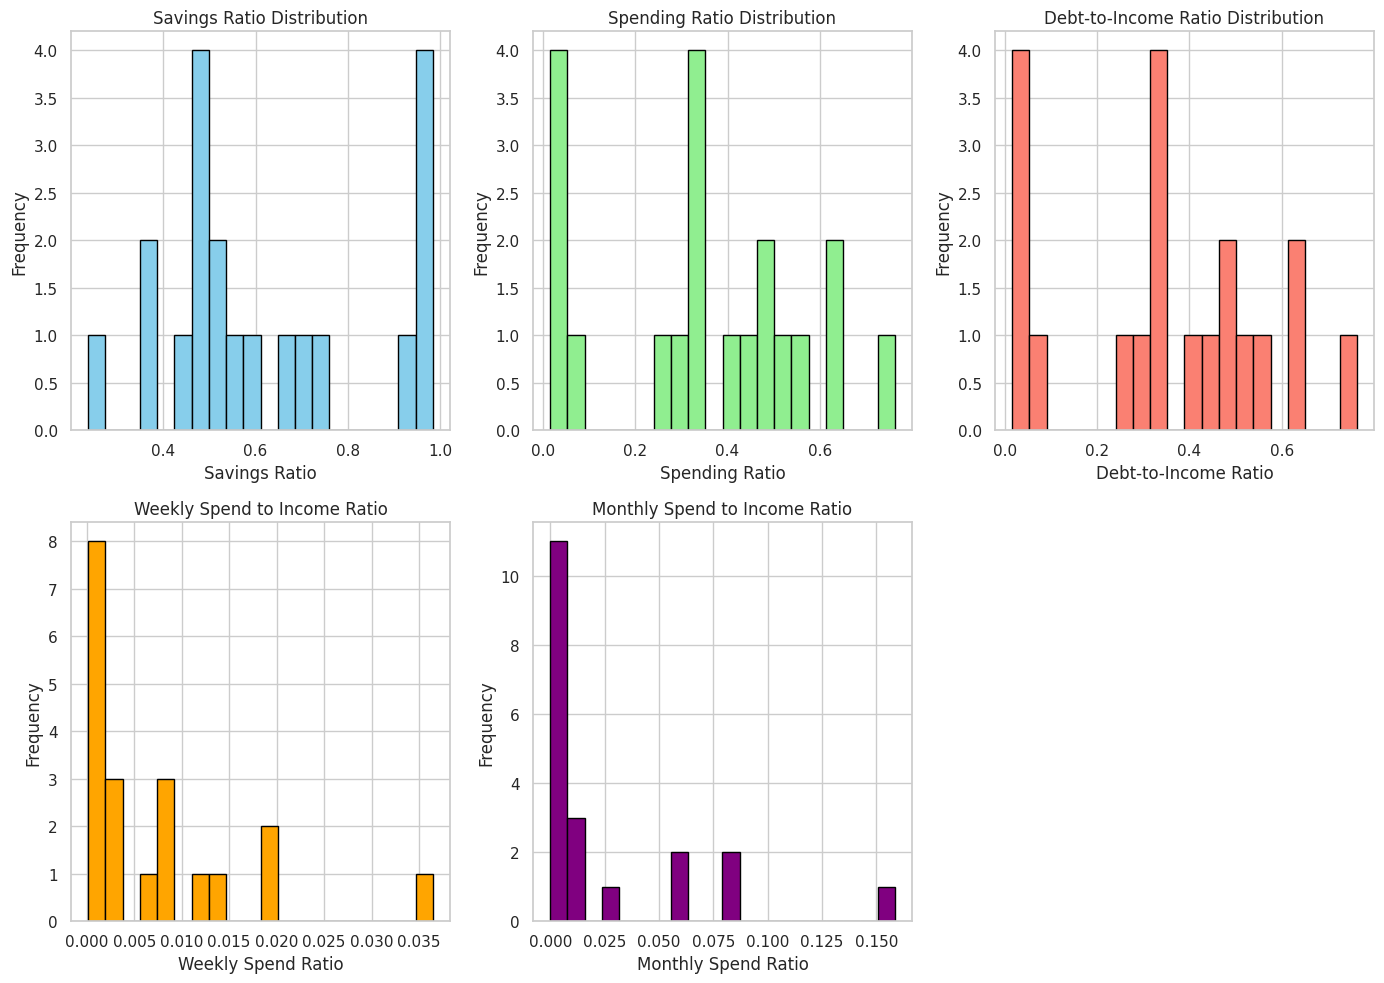


📊 **Displaying Financial Ratio Boxplots by Categories...**


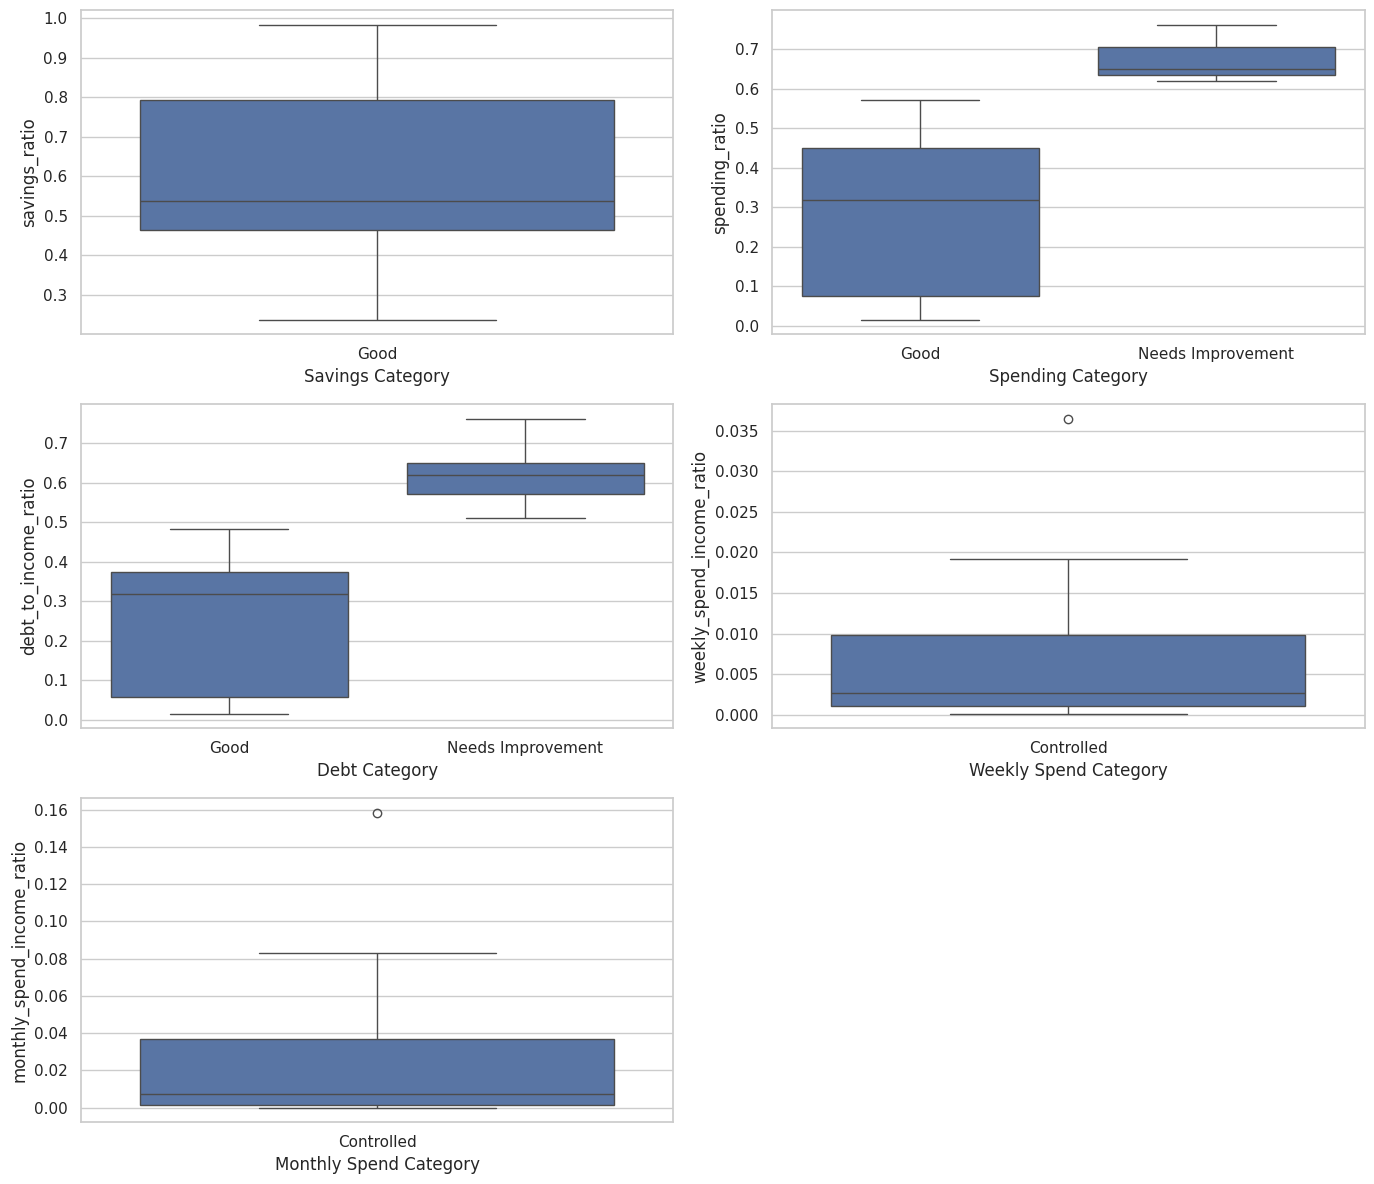


📊 **Displaying Pair Plot for Financial Ratios...**


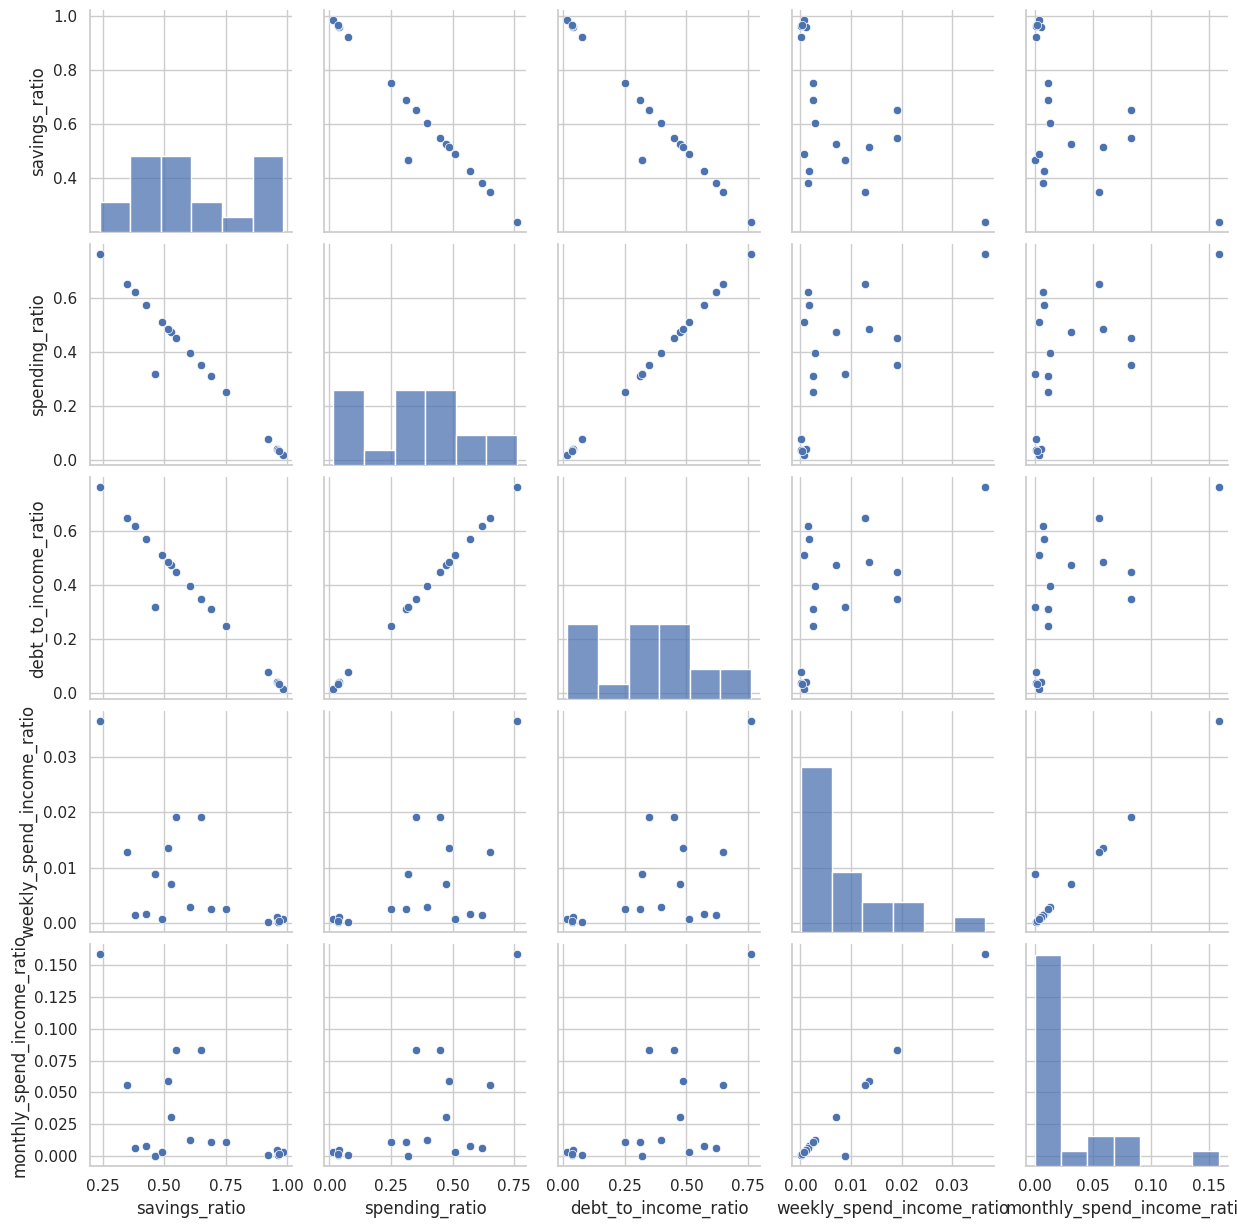


📊 **Displaying Correlation Heatmap...**


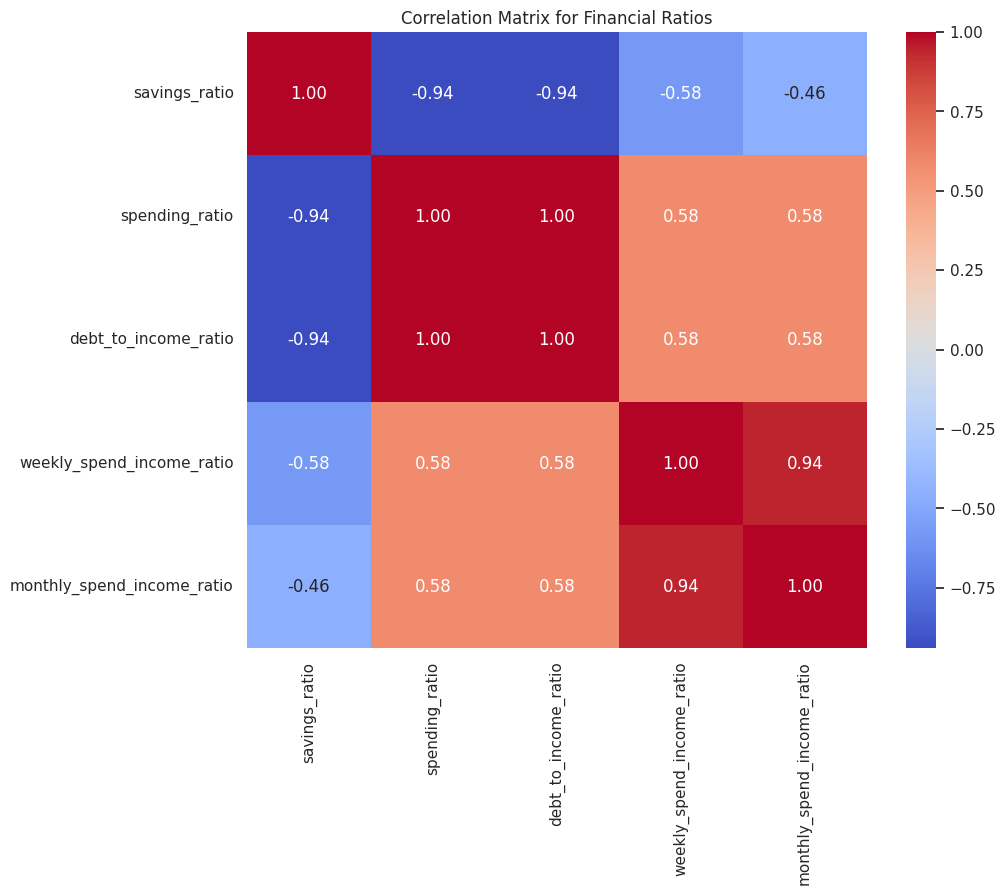


📊 **Top Values in Categorical Columns:**

🔹 **Top 5 partial_postcode:**
partial_postcode
eh3           3
Not Answer    3
EH3           2
SE1           2
se8           2
Name: count, dtype: int64

🔹 **Top 5 occupation:**
occupation
Engineering Professionals                     3
IT and Technology Professionals               3
Not Answer                                    3
Healthcare Professionals                      2
Marketing and Communications Professionals    2
Name: count, dtype: int64

🔹 **Top 5 family_status:**
family_status
Single        9
Partnered     8
Not Answer    3
Name: count, dtype: int64


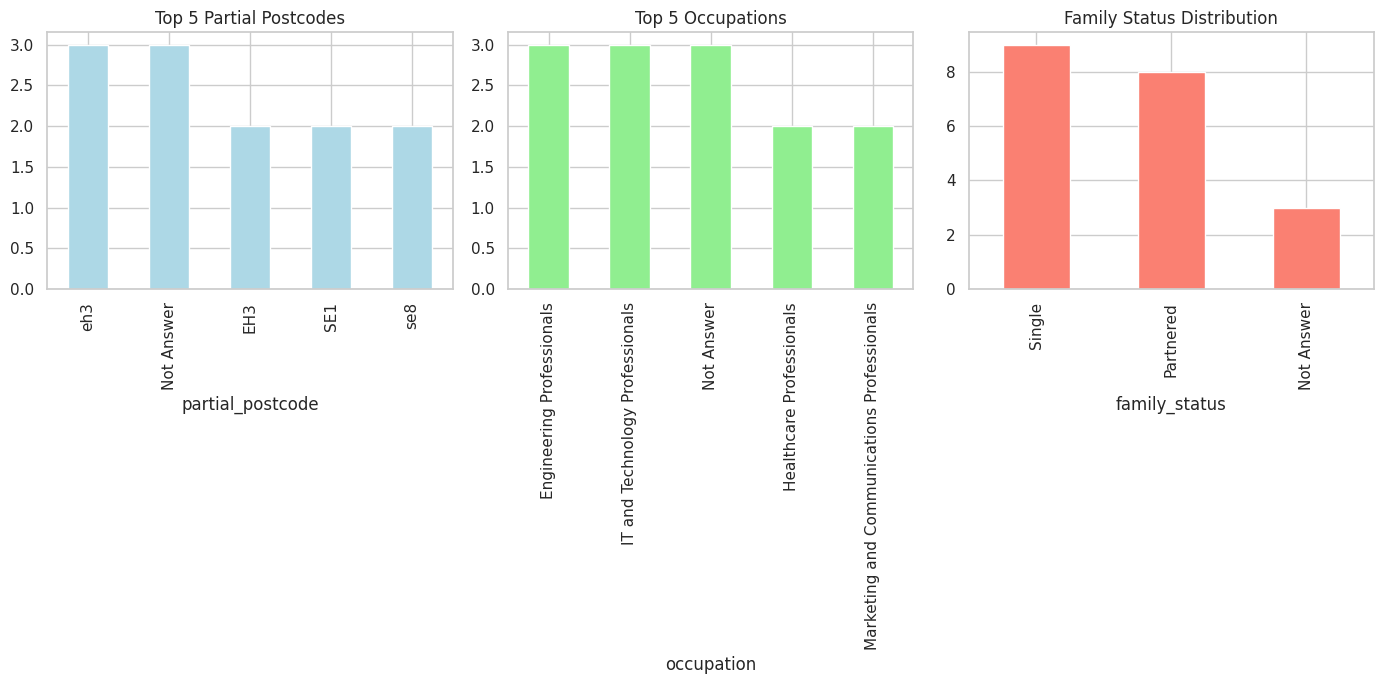

In [ ]:
# Calculate Financial Ratios
data = calculate_financial_ratios(data)

# Perform EDA
perform_eda(data)

User Segmentation

In [ ]:
# User Segmentation Based on Financial Ratios
def segment_users(data):
    # Segment Users Based on Savings Ratio
    data['Savings Segment'] = pd.cut(
        data['savings_ratio'],
        bins=[-np.inf, 0.1, 0.3, 0.5, np.inf],
        labels=['Very Low Saver', 'Low Saver', 'Moderate Saver', 'High Saver']
    )

    # Segment Users Based on Spending Ratio
    data['Spending Segment'] = pd.cut(
        data['spending_ratio'],
        bins=[-np.inf, 0.3, 0.6, 0.8, np.inf],
        labels=['Controlled Spender', 'Moderate Spender', 'High Spender', 'Over Spender']
    )

    # Segment Users Based on Debt-to-Income Ratio
    data['Debt Segment'] = pd.cut(
        data['debt_to_income_ratio'],
        bins=[-np.inf, 0.3, 0.5, 0.7, np.inf],
        labels=['Low Debt', 'Moderate Debt', 'High Debt', 'Very High Debt']
    )

    print("✅ User segmentation based on financial ratios completed.")
    return data


In [ ]:
# Plot User Segments
def plot_user_segments(data):
    plt.figure(figsize=(14, 7))

    # Savings Segment Distribution
    plt.subplot(131)
    sns.countplot(x='Savings Segment', data=data, palette='Blues')
    plt.title('Savings Segment Distribution')
    plt.xlabel('Savings Segment')
    plt.ylabel('Count')

    # Spending Segment Distribution
    plt.subplot(132)
    sns.countplot(x='Spending Segment', data=data, palette='Greens')
    plt.title('Spending Segment Distribution')
    plt.xlabel('Spending Segment')
    plt.ylabel('Count')

    # Debt Segment Distribution
    plt.subplot(133)
    sns.countplot(x='Debt Segment', data=data, palette='Reds')
    plt.title('Debt Segment Distribution')
    plt.xlabel('Debt Segment')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()


In [ ]:
# Generate Recommendations Based on User Segments
def generate_segmented_recommendations(user):
    recommendations = []

    # Savings Segment Recommendations
    if user['Savings Segment'] == 'Very Low Saver':
        recommendations.append('Consider saving at least 5% of your income each month.')
    elif user['Savings Segment'] == 'Low Saver':
        recommendations.append('Try increasing your savings gradually.')

    # Spending Segment Recommendations
    if user['Spending Segment'] == 'Over Spender':
        recommendations.append('Reduce unnecessary expenses to maintain financial stability.')
    elif user['Spending Segment'] == 'High Spender':
        recommendations.append('Monitor your monthly spending more closely.')

    # Debt Segment Recommendations
    if user['Debt Segment'] == 'High Debt':
        recommendations.append('Prioritize paying off your debts to reduce financial burden.')
    elif user['Debt Segment'] == 'Very High Debt':
        recommendations.append('Seek financial advice to manage your debt efficiently.')

    return recommendations

# User Segmentation (Ensure this is called before generating recommendations)
data = segment_users(data)

# Example Usage
user_data = data.iloc[0]  # Select the first user
recommendations = generate_segmented_recommendations(user_data)
print("\n✅ Recommendations for User:")
for rec in recommendations:
    print(f"- {rec}")


✅ User segmentation based on financial ratios completed.

✅ Recommendations for User:


In [ ]:
print(data[['net_savings', 'Savings Segment', 'spending_ratio', 'Spending Segment', 'Debt Segment']].head())

   net_savings Savings Segment  spending_ratio    Spending Segment  \
0       2250.0      High Saver        0.250000  Controlled Spender   
1       1840.0  Moderate Saver        0.572093    Moderate Spender   
2       2845.0      High Saver        0.473148    Moderate Spender   
3       1300.0      High Saver        0.350000    Moderate Spender   
4        250.0       Low Saver        0.761905        High Spender   

     Debt Segment  
0        Low Debt  
1       High Debt  
2   Moderate Debt  
3   Moderate Debt  
4  Very High Debt  


<ipython-input-112-5b6a0fa4dc01>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Savings Segment', data=data, palette='Blues')
<ipython-input-112-5b6a0fa4dc01>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Spending Segment', data=data, palette='Greens')
<ipython-input-112-5b6a0fa4dc01>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Debt Segment', data=data, palette='Reds')


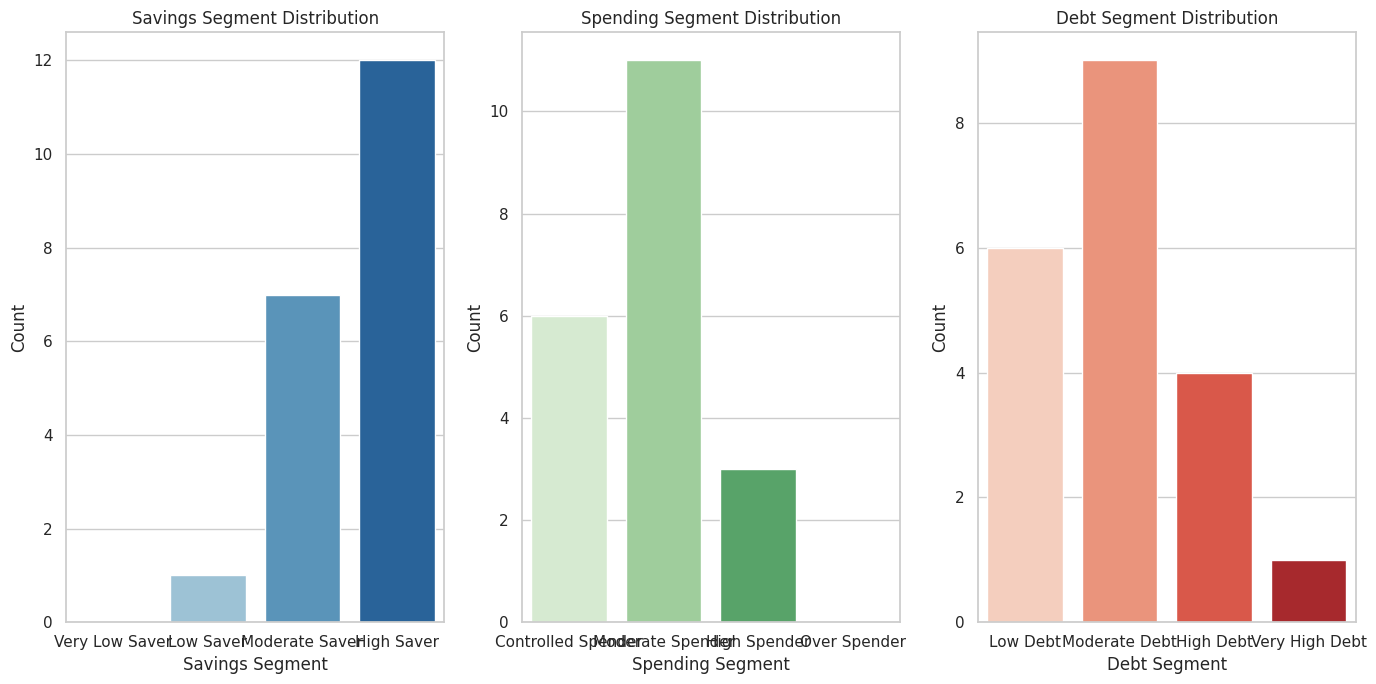

In [ ]:
plot_user_segments(data)


Mathing System

In [ ]:
import pandas as pd

# Generate Recommendations for All Users
def generate_recommendations_for_all(data):
    recommendations_list = []

    for _, user in data.iterrows():
        recommendations = []

        # Savings Ratio Recommendation
        if user['savings_ratio'] < 0.1:
            recommendations.append('Increase your savings to at least 10% of your income.')
        else:
            recommendations.append('Continue good savings habits.')

        # Spending Ratio Recommendation
        if user['spending_ratio'] > 0.6:
            recommendations.append('Reduce unnecessary spending to stay within 60% of your income.')
        else:
            recommendations.append('Your spending habits are well-controlled.')

        # Debt Ratio Recommendation
        if user['debt_to_income_ratio'] > 0.2:
            recommendations.append('Prioritize paying off debt to keep it below 20% of your income.')
        else:
            recommendations.append('You have good debt management skills.')

        recommendations_list.append({
            'User ID': user.get('anonymised_user_id', user.name),
            'Savings Ratio': user['savings_ratio'],
            'Spending Ratio': user['spending_ratio'],
            'Debt-to-Income Ratio': user['debt_to_income_ratio'],
            'Financial Health': 'Moderate' if user['debt_to_income_ratio'] > 0.2 else 'Good',
            'User Segment': 'Struggling' if user['savings_ratio'] < 0.1 or user['spending_ratio'] > 0.6 else 'Secure',
            'Recommendations': '; '.join(recommendations)
        })

    recommendations_df = pd.DataFrame(recommendations_list)
    return recommendations_df


In [ ]:
# Display Recommendations Table
def display_recommendations_table(data):
    recommendations_df = generate_recommendations_for_all(data)

    # Display the table in a user-friendly format
    print("Financial Recommendations Table:**")
    pd.set_option('display.max_columns', None)  # Show all columns
    pd.set_option('display.expand_frame_repr', False)  # Prevent line breaks
    print(recommendations_df.head(10))  # Display the first 10 rows

    # Save to CSV for easy access
    recommendations_df.to_csv('financial_recommendations.csv', index=False)
    print("Recommendations have been saved to 'financial_recommendations.csv'")


In [ ]:
display_recommendations_table(data)

✅ **Financial Recommendations Table:**
   User ID  Savings Ratio  Spending Ratio  Debt-to-Income Ratio Financial Health User Segment                                    Recommendations
0   User_1       0.750000        0.250000              0.250000         Moderate       Secure  Continue good savings habits.; Your spending h...
1   User_2       0.427907        0.572093              0.572093         Moderate       Secure  Continue good savings habits.; Your spending h...
2   User_3       0.526852        0.473148              0.473148         Moderate       Secure  Continue good savings habits.; Your spending h...
3   User_4       0.650000        0.350000              0.350000         Moderate       Secure  Continue good savings habits.; Your spending h...
4   User_5       0.238095        0.761905              0.761905         Moderate   Struggling  Continue good savings habits.; Reduce unnecess...
5   User_6       0.515901        0.484099              0.484099         Moderate       Secu

In [ ]:
import matplotlib.pyplot as plt

def display_combined_table(data):
    """
    Display a combined table of financial segments and recommendations.
    """
    from IPython.display import display, HTML

    display(HTML(data.head(10).to_html(index=False, escape=False)))

# Show the first few rows
display_combined_table(final_data)

anonymised_user_id,savings_ratio,spending_ratio,debt_to_income_ratio,User Segment,Savings Segment,Spending Segment,Debt Segment,Recommendations
User_1,0.750000,0.250000,0.250000,Secure,High Saver,Controlled Spender,Low Debt,Continue good savings habits.; Your spending habits are well-controlled.; Prioritize paying off debt to keep it below 20% of your income.
User_2,0.427907,0.572093,0.572093,Secure,Moderate Saver,Moderate Spender,High Debt,Continue good savings habits.; Your spending habits are well-controlled.; Prioritize paying off debt to keep it below 20% of your income.
User_3,0.526852,0.473148,0.473148,Secure,High Saver,Moderate Spender,Moderate Debt,Continue good savings habits.; Your spending habits are well-controlled.; Prioritize paying off debt to keep it below 20% of your income.
User_4,0.650000,0.350000,0.350000,Secure,High Saver,Moderate Spender,Moderate Debt,Continue good savings habits.; Your spending habits are well-controlled.; Prioritize paying off debt to keep it below 20% of your income.
User_5,0.238095,0.761905,0.761905,Struggling,Low Saver,High Spender,Very High Debt,Continue good savings habits.; Reduce unnecessary spending to stay within 60% of your income.; Prioritize paying off debt to keep it below 20% of your income.
User_6,0.515901,0.484099,0.484099,Secure,High Saver,Moderate Spender,Moderate Debt,Continue good savings habits.; Your spending habits are well-controlled.; Prioritize paying off debt to keep it below 20% of your income.
User_7,0.923000,0.077000,0.077000,Secure,High Saver,Controlled Spender,Low Debt,Continue good savings habits.; Your spending habits are well-controlled.; You have good debt management skills.
User_8,0.550000,0.450000,0.450000,Secure,High Saver,Moderate Spender,Moderate Debt,Continue good savings habits.; Your spending habits are well-controlled.; Prioritize paying off debt to keep it below 20% of your income.
User_9,0.380000,0.620000,0.620000,Struggling,Moderate Saver,High Spender,High Debt,Continue good savings habits.; Reduce unnecessary spending to stay within 60% of your income.; Prioritize paying off debt to keep it below 20% of your income.
User_10,0.465116,0.318605,0.318605,Secure,Moderate Saver,Moderate Spender,Moderate Debt,Continue good savings habits.; Your spending habits are well-controlled.; Prioritize paying off debt to keep it below 20% of your income.


In [ ]:
from google.colab import files
files.download('financial_recommendations.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>